# **Differentiable Wonderland: Chapter 2**
goal: implement solutions to chapter 2 problems from Alice's Adventures in a Differentiable Wonderland, with particular focus given to...

1) numpy arrays + vectorization
2) gradient-based optimization

## **Packages**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## **Part 1: NumPy Exploration**

For a more comprehensive overview of NumPy, consider completing the [NumPy-100 Practice Problems](https://github.com/rougier/numpy-100).

#### Working with Arrays - `np.ndarray`

In [3]:
## create arrays of different dimensions
my_array  = np.array([1, 2, 3]) 
my_matrix = np.array([[1, 2, 3], [4, 5, 6]])
my_tensor = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(f'Array Dimension:  {my_array.shape}')
print(f'Matrix Dimension: {my_matrix.shape}')
print(f'Tensor Dimension: {my_tensor.shape}')

Array Dimension:  (3,)
Matrix Dimension: (2, 3)
Tensor Dimension: (2, 2, 3)


#### Vectorizing a Function

The [np.vectorize](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) function can be used to convert any Python function into a vectorized function. In this context, vectorized means to perform an operation repeatedly on all elements of an n-dimensional array. To vectorize a function, we can pass the function as an argument to `np.vectorize`, or use decorator syntax with the `@` symbol

Note that vectorize does not provide any performance enhancement (e.g., parallelization) relative to a simple for loop. Instead, it is used primary for convenience when working with arrays. NumPy's built-in functions (ex: add, where, etc.) are more reflective of "true" vectorization in that they offer significant boosts in performance. 

In [4]:
## vectorize python function with decorator syntax 
@np.vectorize(otypes=[float])
def raise_power(x:float, pow:int): 
    return x ** pow 

## test on sample input 
test_array = np.array([1, 2, 3])
raise_power(test_array, 2)

array([1., 4., 9.])

## **Part 2: Practice Problems**

In this section, we will work with the following function: 
$$f(\boldsymbol{x}) = \sin(x_1)\cos(x_2) + 0.5\sin(x_1)0.5\cos(x_2); ~~~ x_1, x_2 \in [0, 10]$$

#### Question 1

Implement the function in a vectorized way, i.e, given a matrix $\boldsymbol{X} ~ (n, 2)$ of n inputs, it should return a vector of $f(\boldsymbol{X}) ~ (n)$ where $f(\boldsymbol{X}) = f(\boldsymbol(X_i))$.

$\underline{\text{SOLUTION}}$

In [5]:
## define vectorized function
@np.vectorize(otypes=[float], signature='(n)->()')
def f(x:np.array) -> float: 
    return np.sin(x[0]) * np.cos(x[1]) + 0.5 * np.sin(x[0]) * 0.5 * np.cos(x[1])

## test on sample input 
X = np.array([[1, 2], [3, 4], [5, 6]])
y = f(X)

for x, y in zip(X, y): 
    print(f'f({x[0]},{x[1]}) = {y:.4f}')

f(1,2) = -0.4377
f(3,4) = -0.1153
f(5,6) = -1.1509


#### Question 2

Implement another function to compute its gradient (hard-coded - we have not touched automatic differentiation yet). 

$\underline{\text{SOLUTION}}$

First, let's derive the gradient of our function. We'll start with the partial derivative w.r.t. $x_1$:
$$\frac{\partial{f}}{\partial{x_1}} = \frac{\partial{f}}{\partial{x_1}} \sin(x_1)\cos(x_2) + 0.5\sin(x_1)0.5\cos(x_2)$$
$$\frac{\partial{f}}{\partial{x_1}} = \cos(x_1)\cos(x_2) + 0.5\cos(x_1)0.5\cos(x_2)$$
$$\frac{\partial{f}}{\partial{x_1}} = 1.25\cos(x_1)\cos(x_2)$$

Next, let's calculate the partial derivative w.r.t. $x_2$: 
$$\frac{\partial{f}}{\partial{x_2}} = \frac{\partial{f}}{\partial{x_2}} \sin(x_1)\cos(x_2) + 0.5\sin(x_1)0.5\cos(x_2)$$
$$\frac{\partial{f}}{\partial{x_2}} = -\sin(x_1)\sin(x_2) - 0.5\sin(x_1)0.5\sin(x_2)$$
$$\frac{\partial{f}}{\partial{x_2}} = -1.25\sin(x_1)\sin(x_2)$$

Now we have the information necessary to hard-code our gradient function.

In [6]:
## define (vectorized) function to compute gradient 
@np.vectorize(otypes=[float], signature='(n)->(n)') 
def calc_gradient(x:np.array): 
    grad_x1 = 1.25 * np.cos(x[0]) * np.cos(x[1])
    grad_x2 = -1.25 * np.sin(x[0]) * np.sin(x[1])
    return np.array([grad_x1, grad_x2]) 

## test on sample input
X = np.array([[1, 2], [3, 4], [5, 6]])
grad = calc_gradient(X)

for x, grad in zip(X, grad): 
    print(f'df/dx1({x[0]}) = {grad[0]:.4f}, df/dx2({x[1]}) = {grad[1]:.4f}')

df/dx1(1) = -0.2811, df/dx2(2) = -0.9564
df/dx1(3) = 0.8089, df/dx2(4) = 0.1335
df/dx1(5) = 0.3405, df/dx2(6) = -0.3349


#### Question 3

Write a basic gradient descent procedure and visualize the paths taken by the optimization process from multiple starting points. 

$\underline{\text{SOLUTION}}$

First, let's calculate and plot some sample coordinates for our input domain.

In [7]:
## define function to calculate coordinates given possible input domains
def calc_coords(x1_domain, x2_domain) -> np.array: 

    # generate all possible combinations of input values, then reshape into matrix 
    x1_grid, x2_grid = np.meshgrid(x1_domain, x2_domain)
    X = np.stack([x1_grid, x2_grid], axis=2).reshape((len(x1_domain) * len(x2_domain), 2))

    # calculate function output by row 
    y = f(X) 

    # extract x1 and x2 vectors 
    x1 = X[:,0]
    x2 = X[:,1] 

    # return output as tuple of each dimension's values 
    return (x1, x2, y)
    
## define domain for x1, x2
x1_domain = np.linspace(0, 10, 100)
x2_domain = np.linspace(0, 10, 100) 

## gather coordinates
x1, x2, y = calc_coords(x1_domain, x2_domain)

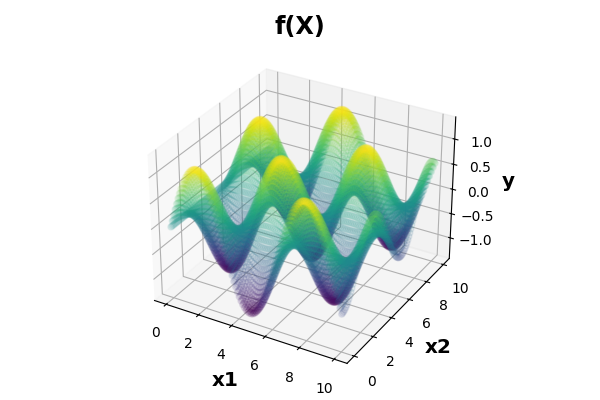

In [12]:
## enable ipympl for interactivity (e.g., rotation)
%matplotlib ipympl

## define function for plotting
def plot_function(surf_points:tuple[3], optim_points:tuple[3]=None, title='f(X)') -> None: 

    """ plots the following points in 3D space: 
        - surf_points -> points forming the function surface
        - optim_points (optional) -> points attained during optimization 
    """

    # unpack arguments 
    surf_x1, surf_x2, surf_y = surf_points 
    if (optim_points is not None): 
        optim_x1, optim_x2, optim_y = optim_points

    # init 3D plot
    fig = plt.figure(figsize=(6,4))
    ax  = fig.add_subplot(projection='3d')

    # plot function surface
    ax.scatter(surf_x1, surf_x2, surf_y, c=y, alpha=0.1)

    # optionally plot optimization points 
    if (optim_points is not None): 
        ax.scatter(optim_x1, optim_x2, optim_y, color='red', marker='X', s=plt.rcParams['lines.markersize'] ** 2)

    ax.set_xlabel('x1', weight='bold', size='x-large')
    ax.set_ylabel('x2', weight='bold', size='x-large')
    ax.set_zlabel('y', weight='bold', size='x-large')

    plt.title(title, weight='bold', size='xx-large')

    plt.tight_layout()

    plt.show()

## plot base function
plot_function(surf_points=(x1, x2, y))

Now that we've plotted our function, let's write some code to run a (randomly-initialized) gradient descent trial, then plot the results.

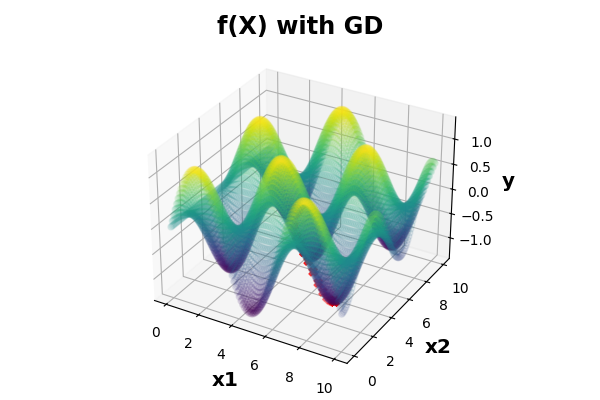

In [18]:
## define hyperparameters 
LEARNING_RATE = 0.3 
N_ITER = 50

## randomly initialize inputs + define starting coordinates
optim_x1 = [np.random.random_sample() * 10]
optim_x2 = [np.random.random_sample() * 10]
optim_y  = [f(np.array([optim_x1[0], optim_x2[0]]))]

## perform iterations of gradient descent 
for i in range(1, N_ITER + 1): 

    X = np.array([optim_x1[i-1], optim_x2[i-1]])
    grad = calc_gradient(X) 
    new_X = X - LEARNING_RATE * grad 
    new_y = f(new_X) 

    optim_x1.append(new_X[0])
    optim_x2.append(new_X[1])
    optim_y.append(new_y)

## plot results 
plot_function(surf_points=(x1, x2, y), optim_points=(optim_x1, optim_x2, optim_y), title='f(X) with GD')

#### Question 4

Try adding a momentum term and visualizing the norm of the gradients, which should converge to zero as the algorithm moves towards a stationary point.

$\underline{\text{SOLUTION}}$

Iteration 1: Norm = 0.5326
Iteration 2: Norm = 0.5697
Iteration 3: Norm = 0.7152
Iteration 4: Norm = 0.8617
Iteration 5: Norm = 0.8467
Iteration 6: Norm = 0.5943
Iteration 7: Norm = 0.2660
Iteration 8: Norm = 0.0589
Iteration 9: Norm = 0.0130


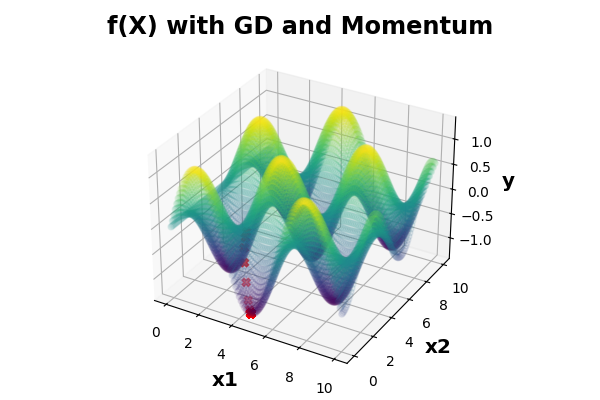

In [22]:
## define hyperparameters 
MOMENTUM = 0.5
LEARNING_RATE = 0.3 
N_ITER = 50

## randomly initialize inputs + define starting coordinates
optim_x1 = [np.random.random_sample() * 10]
optim_x2 = [np.random.random_sample() * 10]
optim_y  = [f(np.array([optim_x1[0], optim_x2[0]]))]

grad = np.array([0, 0])
## perform iterations of gradient descent 
for i in range(1, N_ITER + 1): 

    prev_grad = grad.copy() 
    X = np.array([optim_x1[i-1], optim_x2[i-1]])
    grad = calc_gradient(X) 
    new_X = X - LEARNING_RATE * (MOMENTUM * prev_grad + grad) 
    new_y = f(new_X) 

    optim_x1.append(new_X[0])
    optim_x2.append(new_X[1])
    optim_y.append(new_y)

    norm = np.sqrt(grad.T @ grad)

    if (i < 10):
        print(f'Iteration {i}: Norm = {norm:.4f}')

## plot results 
plot_function(surf_points=(x1, x2, y), optim_points=(optim_x1, optim_x2, optim_y), title='f(X) with GD and Momentum')